## Ouverture et affichage d'un fichier audio avec Python



Installation des packages et téléchargement d'un fichier audio exemple.

In [1]:
!pip install matplotlib
!pip install soundfile
!wget http://sabiod.lis-lab.fr/pub/challenges/Biosonar/audio_example.wav
!pip install obspy
!pip install scipy

'wget' n’est pas reconnu en tant que commande interne
ou externe, un programme exécutable ou un fichier de commandes.


Il existe plusieurs manières de charger un signal audio avec Python. Dans cet exemple nous utiliserons la bibliothèque [Soundfile](https://pysoundfile.readthedocs.io/en/latest/).

In [2]:
import soundfile as sf
sig, sr = sf.read("audio_example.wav")
print("Taille du signal : %s"%sig.shape)

Taille du signal : 51200


La fonction prend en paramètre le nom du fichier (chemin + nom) et retourne 2 éléments :
- Le signal audio, si le fichier audio est en Mono (un seul canal), le signal sera un vecteur de dimension {nombre_de_sample} = {durée_du_signal} * {fréquence_échantillonage}. Si le fichier audio est un Stéréo (deux canaux), le signal sera une matrice de dimension [{nombre_de_sample},{nombre_de_canaux}].
- La fréquence d'échantillonnage (Sampling Rate)

Pour le challenge, seul des fichiers mono seront utilisé. Si besoin il est possible de ne charger qu'une partie du signal en utilisant les arguments : "start" et "stop" lors de l'appel à read.

Pour afficher le signal :

In [3]:
sr

256000

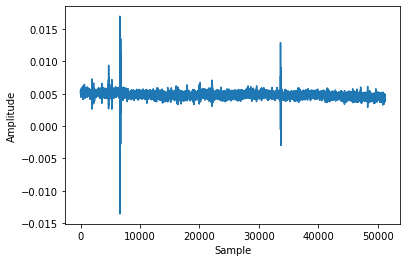

In [4]:
import matplotlib.pyplot as plt
plt.plot(sig)
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.show()

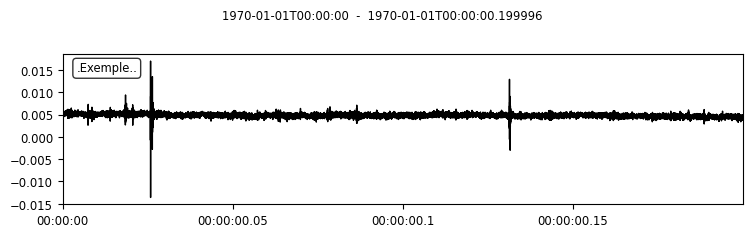

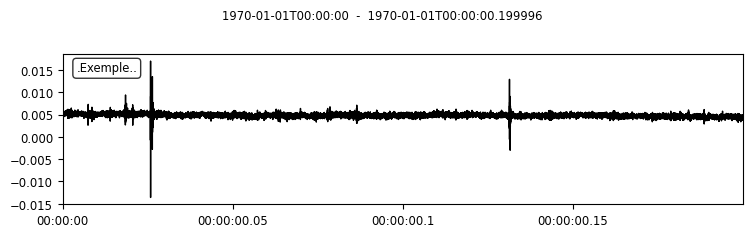

In [6]:
from obspy import UTCDateTime, read, Trace, Stream
trace = Trace(sig)
trace.stats.sampling_rate = 256000
trace.stats.station = 'Exemple'
st = Stream(traces=trace)
trace.plot()

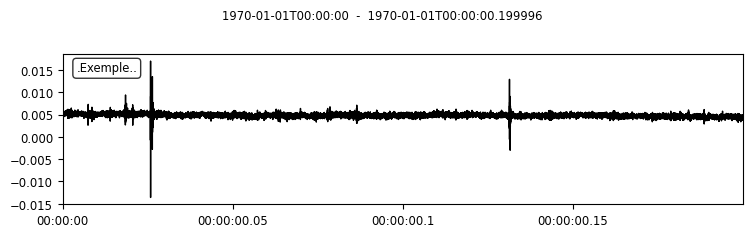

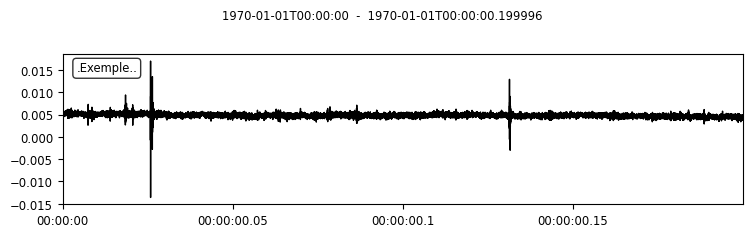

In [7]:
st.plot()

# Filtrage

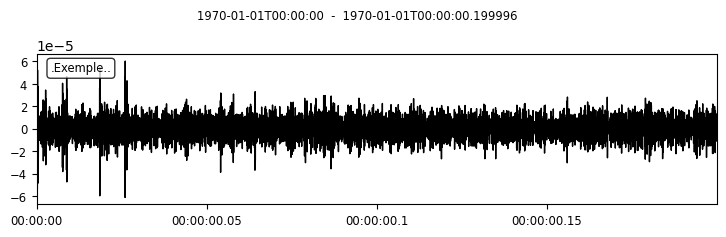

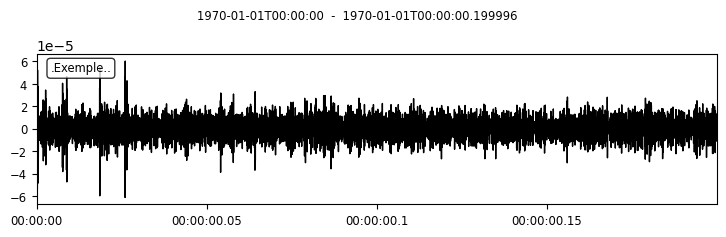

In [27]:
trace.filter("highpass", freq=5000.0)
trace.plot()

# Spectre d'amplitude

In [23]:
from scipy.fft import fft, ifft
import numpy as np

Text(0, 0.5, 'Amplitude')

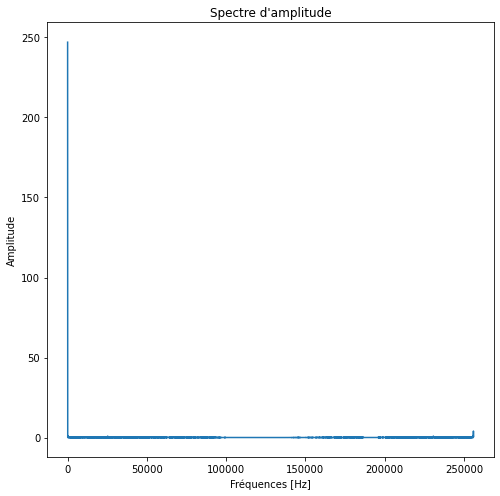

In [24]:
SIG = np.abs(fft(sig))
dt = 1/sr
fe = 1/dt
T = 0.2
df = 1/T
fech = 256000 #Hz
X = np.arange(0,fe,df)

fig, ax1 = plt.subplots(nrows=1, figsize=(8,8))
ax1.set_title("Spectre d'amplitude")
ax1.plot(X,SIG)
ax1.set_xlabel('Fréquences [Hz]')
ax1.set_ylabel('Amplitude')

 

In [12]:
df

NameError: name 'df' is not defined

Il est également possible de tracer le spectrogramme du signal (représentation du temps fréquence).
Cette représentation permet d'avoir un aperçu du contenu fréquentiel de signal.

In [ ]:
!pip install matplotlib
!pip install librosa

In [ ]:
import librosa as lr
import librosa.display
import numpy as np

In [ ]:
tf_sig = lr.stft(sig, n_fft=2048)
tf_sig = np.abs(tf_sig)

In [ ]:
lr.display.specshow(lr.amplitude_to_db(tf_sig, ref=np.max));plt.title("Spectrogram");plt.xlabel("Time"); plt.ylabel("Frequencies");plt.show()